In [22]:
import pandas as pd
import plotly.express as px

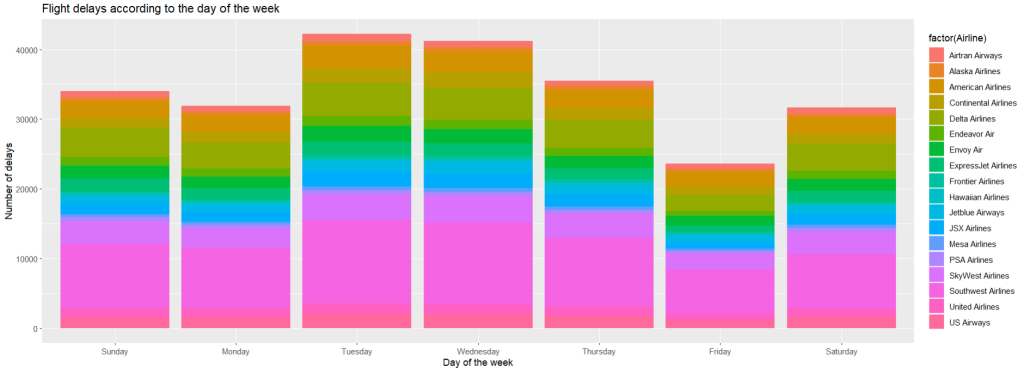

In [23]:
from IPython.display import Image
Image(filename="delays-day-of-week-and-airline.png")

Powyższy wykres został pobrany ze strony https://studentwork.prattsi.org/infovis/visualization/visualizing-flight-delays-in-recent-times/?fbclid=IwAR2PgKFuYGnQYApZCkobnZvG-CdVlx0LtyUZeh55JY6jRYp7CEY4t7xuPIw.

Kolory użyte na nim mocno się ze sobą zlewają, przez co bardzo ciężko jest odczytać co prezentuje wykres. Ponadto na wykresie zostało umieszczonych wiele linii lotniczych, a zbyt wiele kategorii wpływa negatywnie na czytelność wykresu.

Korzystając z danych wykorzystanych do stworzenia powyższego wykresu, poprawię go w celu zwiększenia jego czytelności.

In [24]:
df = pd.read_csv('airlines_delay.csv')
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [25]:
df.columns

Index(['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'Class'],
      dtype='object')

In [26]:
summary = pd.DataFrame(df.dtypes, columns=['typ_danych'])
summary['null_values'] = pd.DataFrame(df.isnull().any())
summary['ile_null_values'] = pd.DataFrame(df.isnull().sum())
summary['procent_nulls_values'] = round((df.apply(pd.isnull).mean() * 100), 2)
summary.sort_index(inplace=True)
summary

,typ_danych,null_values,ile_null_values,procent_nulls_values
Airline,object,False,0,0.0
AirportFrom,object,False,0,0.0
AirportTo,object,False,0,0.0
Class,int64,False,0,0.0
DayOfWeek,int64,False,0,0.0
Flight,float64,False,0,0.0
Length,float64,False,0,0.0
Time,float64,False,0,0.0


In [27]:
df['Airline'].unique()

array(['DL', 'OO', 'B6', 'US', 'FL', 'WN', 'CO', 'AA', 'YV', 'EV', 'XE',
       '9E', 'OH', 'UA', 'MQ', 'AS', 'F9', 'HA'], dtype=object)

In [28]:
airline_mapping = {
    'DL': 'Delta Airlines',
    'OO': 'SkyWest Airlines',
    'B6': 'JetBlue Airways',
    'US': 'US Airways',
    'FL': 'AirTran Airways',
    'WN': 'Southwest Airlines',
    'CO': 'Continental Airlines',
    'AA': 'American Airlines',
    'YV': 'Mesa Airlines',
    'EV': 'ExpressJet Airlines',
    'XE': 'ExpressJet Airlines',
    '9E': 'Endeavor Air',
    'OH': 'PSA Airlines',
    'UA': 'United Airlines',
    'MQ': 'Envoy Air',
    'AS': 'Alaska Airlines',
    'F9': 'Frontier Airlines',
    'HA': 'Hawaiian Airlines'
}

df_grouped = df.groupby(['DayOfWeek', 'Airline'])['Flight'].count().reset_index()
df_grouped['Airline'] = df_grouped['Airline'].map(airline_mapping)
df_grouped.loc[df_grouped['Flight'] < 3500, 'Airline'] = 'Others'

color_sequence = ['#656666', '#aec7e8', '#ff7f0e', '#030100', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#eaf202',
                  '#ff00ff', '#00ffff', '#ff4500', '#008080', '#ffa500',
                  '#00ff00', '#800080', '#00ff7f']

day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

df_grouped = df_grouped.groupby(['DayOfWeek', 'Airline'])['Flight'].sum().reset_index()
df_grouped['DayOfWeek'] = df_grouped['DayOfWeek'].map(day_mapping)

df_grouped['Flight'] = df_grouped['Flight'] / 1000

num_bars = len(df_grouped)
bar_width = 0.8 / num_bars

df_grouped = df_grouped.sort_values(by=['DayOfWeek', 'Flight'], ascending=[True, False])

fig = px.bar(df_grouped,
             x="DayOfWeek",
             y="Flight",
             color="Airline",
             color_discrete_sequence=color_sequence,
             title="Flight delays according to the day of the week and airline")

fig.update_layout(barmode='stack')

fig.update_layout(
    width=1000,
    height=800,
    font=dict(size=16)
)

fig.update_yaxes(title_text='Number of delays (in thousands)')
fig.update_xaxes(title_text='Day of the week')

fig.show()

Powyższy wykres stworzony przeze mnie prezentuje informacje w sposób bardziej przystępny niż wykres pobrany ze strony z kilku istotnych powodów:

* Użyte kolory są znacznie bardziej wyraziste, co pozwala na łatwiejsze odróżnienie poszczególnych grup na wykresie.
* Legenda jest bardziej czytelna, co ułatwia identyfikację poszczególnych elementów na wykresie.
* Dodana interaktywność zdecydowanie zwiększa poziom zrozumienia wykresu, umożliwiając łatwiejsze sprawdzenie, która grupa znajduje się w konkretnym miejscu na wykresie.
* Jednostki zostały skrócone, co nie tylko przyczynia się do oszczędności miejsca, ale także poprawia czytelność informacji.
* Zastosowana większa czcionka znacząco ułatwia odczytywanie informacji z wykresu, co przekłada się na lepsze zrozumienie prezentowanych danych.